In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [2]:
import yal

#modules = yal.read('./yal_files/ami33.yal')

modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

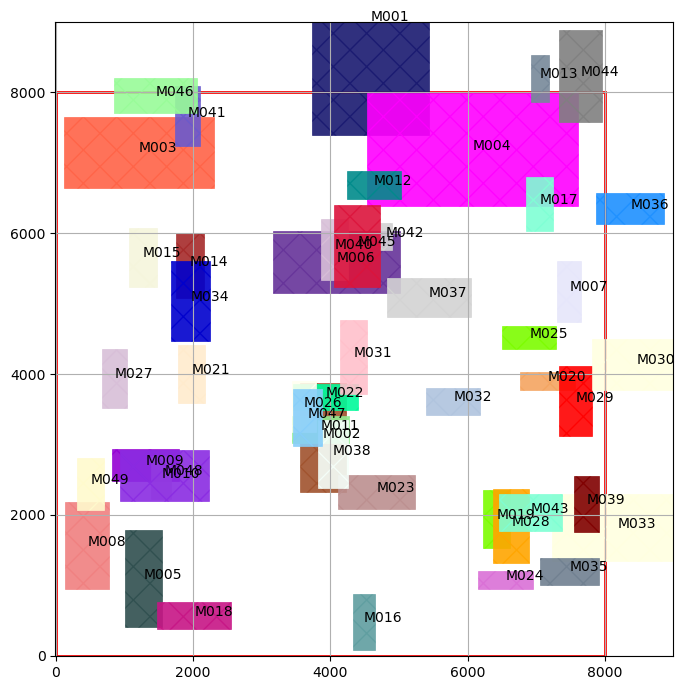

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 8000,
               "height" : 8000}

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 9000, 9000)

In [4]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


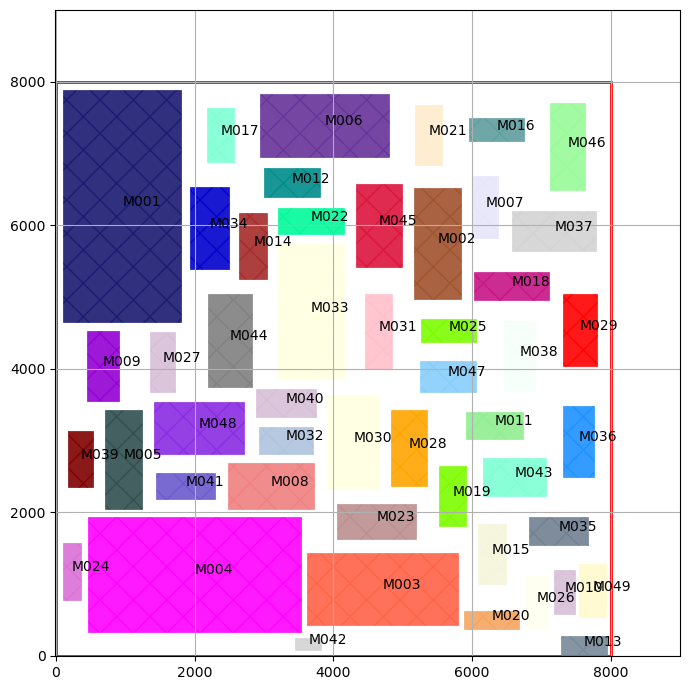

One Round of Interaction took: 22.325401306152344 seconds
Center Exploration took: 0.0038552284240722656
Budge Exploration took: 0.014960289001464844
Hustle Exploration took: 0.003801107406616211
Swap Exploration took: 0.1948404312133789
Center Exploration took: 0.003727436065673828
Budge Exploration took: 0.011227130889892578
Hustle Exploration took: 0.005448102951049805
Swap Exploration took: 0.19350433349609375
Center Exploration took: 0.0038623809814453125
Budge Exploration took: 0.015289306640625
Hustle Exploration took: 0.003830432891845703
Swap Exploration took: 0.19655466079711914
Center Exploration took: 0.0037293434143066406
Budge Exploration took: 0.007498264312744141
Hustle Exploration took: 0.0046329498291015625
Swap Exploration took: 0.19376802444458008
Center Exploration took: 0.0038940906524658203
Budge Exploration took: 0.015463829040527344
Hustle Exploration took: 0.0038535594940185547
Swap Exploration took: 0.19646263122558594
Center Exploration took: 0.0037775039672

KeyboardInterrupt: 

In [5]:
while True:

    participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 9000, 9000)

    print('One Round of Interaction took: ' + str(runtime) + ' seconds')


    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(last_moves)

    if moves.count('linger') == len(participants):

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 25:
            break

        else:
            layout_zone         = scale_layout_zone(layout_zone, 0.99) 

            participants        = reset_after_tightening(participants)



    # Minimum distance to large!